<a href="https://colab.research.google.com/github/Dhairyakumarshah/Plant-disease/blob/main/Latest_plant_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Dataset-1_12_types_Summary:

In [ ]:

import os  # This helps us work with files and folders (operating system)
from collections import defaultdict  # to count images

# This function will count pictures of plants leaf in different folders
def count_images_with_health_status(directory):
    # We'll use this to keep track of how many healthy and diseased plants we have in our dataset
    plant_counts = defaultdict(lambda: {'healthy': 0, 'diseased': 0})
    # This will find total number of pictures
    total_count = 0

    # Now we are going to look all the folders and files in the given place
    for root, dirs, files in os.walk(directory):
        # to check that which type of images we have  (like .png, .jpg, or .jpeg)
        image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        # If we found any pictures...
        if image_files:
            # Figure out if the plant is healthy or sick from the folder name
            health_status = os.path.basename(root)  # This is the folder name (healthy or diseased)
            # Find out what kind of plant leaf existing in the parent folder
            plant_name = os.path.basename(os.path.dirname(root))  # This is the plant's name(defining plant name by the directory)

            # If the folder says the plant is healthy or diseased...
            if health_status in ['healthy', 'diseased']:
                # Add the number of pictures to our count
                plant_counts[plant_name][health_status] += len(image_files)
                # Add to the total count too
                total_count += len(image_files)

    # When we're done looking, we'll return the total count and the counts for each plant
    return total_count, plant_counts

# This is where we keep our first set of plant pictures
dataset1 = "/content/drive/MyDrive/12_types"

# Let's count the pictures in our first set
print("Dataset1 Summary:")
dataset1_total, dataset1_per_label = count_images_with_health_status(dataset1)
# Show how many pictures we found in total
print(f"Total images in Dataset1: {dataset1_total}")
# Show how many pictures we found for each plant
print("Image count per label:")
for plant, counts in dataset1_per_label.items():
    healthy_count = counts['healthy']
    diseased_count = counts['diseased']
    print(f"  {plant}: Healthy {healthy_count} images, Diseased {diseased_count} images")

Dataset1 Summary:
Total images in Dataset1: 4502
Image count per label:
  Basil (P8): Healthy 148 images, Diseased 0 images
  Lemon (P10): Healthy 159 images, Diseased 77 images
  Bael (P4): Healthy 0 images, Diseased 118 images
  Mango (P0): Healthy 170 images, Diseased 265 images
  Jamun (P5): Healthy 279 images, Diseased 345 images
  Jatropha (P6): Healthy 133 images, Diseased 124 images
  Pongamia Pinnata (P7): Healthy 322 images, Diseased 276 images
  Pomegranate (P9): Healthy 287 images, Diseased 272 images
  Chinar (P11): Healthy 103 images, Diseased 120 images
  Gauva (P3): Healthy 277 images, Diseased 142 images
  Alstonia Scholaris (P2): Healthy 179 images, Diseased 254 images
  Arjun (P1): Healthy 220 images, Diseased 232 images


###Dataset2_39_types_with_augmentation_Summary

In [ ]:
import os
from collections import defaultdict

# Function to count images in a dataset directory
def count_images(dataset_dir):
    total_images = 0
    class_counts = defaultdict(int)

    # Traverse the dataset directory
    for class_label in os.listdir(dataset_dir):
        class_path = os.path.join(dataset_dir, class_label)
        if os.path.isdir(class_path):
            # Count the number of image files in the class folder
            image_count = len([
                f for f in os.listdir(class_path)
                if f.lower().endswith(('.png', '.jpg', '.jpeg'))
            ])
            class_counts[class_label] = image_count
            total_images += image_count

    return total_images, class_counts

# Path to Dataset2
dataset2 = "/content/drive/MyDrive/39_types_with_augmentation"

# Count images in Dataset2
print("\nDataset2 Summary:")
dataset2_count, dataset2_classes = count_images(dataset2)
print(f"Total images in Dataset2: {dataset2_count}")
for class_name, count in dataset2_classes.items():
    print(f"  {class_name}: {count} images")



Dataset2 Summary:
Total images in Dataset2: 61486
  Tomato___Tomato_mosaic_virus: 1000 images
  Tomato___Spider_mites Two-spotted_spider_mite: 1676 images
  Tomato___Early_blight: 1000 images
  Tomato___Tomato_Yellow_Leaf_Curl_Virus: 5357 images
  Tomato___Leaf_Mold: 1000 images
  Tomato___healthy: 1591 images
  Tomato___Bacterial_spot: 2127 images
  Tomato___Late_blight: 1909 images
  Tomato___Septoria_leaf_spot: 1771 images
  Tomato___Target_Spot: 1404 images
  Squash___Powdery_mildew: 1835 images
  Soybean___healthy: 5090 images
  Raspberry___healthy: 1000 images
  Strawberry___healthy: 1000 images
  Pepper,_bell___healthy: 1478 images
  Potato___Late_blight: 1000 images
  Potato___Early_blight: 1000 images
  Potato___healthy: 1000 images
  Strawberry___Leaf_scorch: 1109 images
  Pepper,_bell___Bacterial_spot: 1000 images
  Grape___healthy: 1000 images
  Grape___Esca_(Black_Measles): 1383 images
  Orange___Haunglongbing_(Citrus_greening): 5507 images
  Corn___Northern_Leaf_Blight: 

###COMBINING BOTH DATASETS

In [ ]:
import os
import shutil

# Define dataset directories
dataset1_dir = "/content/drive/MyDrive/12_types"
dataset2_dir = "/content/drive/MyDrive/39_types_with_augmentation"
combined_dir = "/content/drive/MyDrive/combined_dataset"

# Function to check if the dataset is already combined
def is_combined(dest_dir):
    if os.path.exists(dest_dir) and any(os.scandir(dest_dir)):
        return True
    return False

# Function to combine Dataset 1
def combine_dataset1(src_dir, dest_dir):
    for plant_label in os.listdir(src_dir):
        plant_path = os.path.join(src_dir, plant_label)
        if os.path.isdir(plant_path):
            for health_status in os.listdir(plant_path):  # 'healthy' or 'diseased'
                health_status_path = os.path.join(plant_path, health_status)
                if os.path.isdir(health_status_path):
                    class_label = f"{plant_label}_{health_status}"  # Combine plant and health status
                    class_dir = os.path.join(dest_dir, class_label)
                    os.makedirs(class_dir, exist_ok=True)
                    for image_file in os.listdir(health_status_path):
                        if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                            src_file = os.path.join(health_status_path, image_file)
                            shutil.copy(src_file, os.path.join(class_dir, image_file))

# Function to combine Dataset 2
def combine_dataset2(src_dir, dest_dir):
    for class_label in os.listdir(src_dir):
        class_path = os.path.join(src_dir, class_label)
        if os.path.isdir(class_path):
            class_dir = os.path.join(dest_dir, class_label)
            os.makedirs(class_dir, exist_ok=True)
            for image_file in os.listdir(class_path):
                if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    src_file = os.path.join(class_path, image_file)
                    shutil.copy(src_file, os.path.join(class_dir, image_file))

# Main execution logic
if is_combined(combined_dir):
    print("Dhairya, your dataset is already combined!")
else:
    # Create the combined dataset directory
    os.makedirs(combined_dir, exist_ok=True)

    # Combine both datasets
    combine_dataset1(dataset1_dir, combined_dir)
    combine_dataset2(dataset2_dir, combined_dir)

    print("Datasets successfully combined into:", combined_dir)


Dhairya, your dataset is already combined!


###Visualization of total number of lables

In [ ]:
import os

# Path to the combined dataset directory
combined_dir = "/content/drive/MyDrive/combined_dataset"

# Function to list and print all class labels
def list_classes(dataset_dir):
    print("Classes in Combined Dataset:")
    class_labels = []
    for class_label in sorted(os.listdir(dataset_dir)):  # Sort for better readability
        class_path = os.path.join(dataset_dir, class_label)
        if os.path.isdir(class_path):  # Ensure it's a directory (class folder)
            class_labels.append(class_label)
    for idx, class_name in enumerate(class_labels, 1):
        print(f"{idx}. {class_name}")
    print(f"\nTotal Classes: {len(class_labels)}")

# List classes
list_classes(combined_dir)


Classes in Combined Dataset:
1. Alstonia Scholaris (P2)_diseased
2. Alstonia Scholaris (P2)_healthy
3. Apple___Apple_scab
4. Apple___Black_rot
5. Apple___Cedar_apple_rust
6. Apple___healthy
7. Arjun (P1)_diseased
8. Arjun (P1)_healthy
9. Background_without_leaves
10. Bael (P4)_diseased
11. Basil (P8)_healthy
12. Blueberry___healthy
13. Cherry___Powdery_mildew
14. Cherry___healthy
15. Chinar (P11)_diseased
16. Chinar (P11)_healthy
17. Corn___Cercospora_leaf_spot Gray_leaf_spot
18. Corn___Common_rust
19. Corn___Northern_Leaf_Blight
20. Corn___healthy
21. Gauva (P3)_diseased
22. Gauva (P3)_healthy
23. Grape___Black_rot
24. Grape___Esca_(Black_Measles)
25. Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
26. Grape___healthy
27. Jamun (P5)_diseased
28. Jamun (P5)_healthy
29. Jatropha (P6)_diseased
30. Jatropha (P6)_healthy
31. Lemon (P10)_diseased
32. Lemon (P10)_healthy
33. Mango (P0)_diseased
34. Mango (P0)_healthy
35. Orange___Haunglongbing_(Citrus_greening)
36. Peach___Bacterial_spot
37. Peac

###Here we are going to split datasets into train test and validation,

In [ ]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Combined dataset directory
combined_dir = "/content/drive/MyDrive/combined_dataset"

# Output directories for splits
output_base_dir = "/content/drive/MyDrive/split_limited_dataset"
train_dir = os.path.join(output_base_dir, "train")
val_dir = os.path.join(output_base_dir, "val")
test_dir = os.path.join(output_base_dir, "test")

# Number of images per class to use
limit_per_class = 100

# Function to check if a directory is already split
def is_dataset_split(train_dir, val_dir, test_dir):
    # Check if all split directories exist and contain files
    for split_dir in [train_dir, val_dir, test_dir]:
        if not os.path.isdir(split_dir) or len(os.listdir(split_dir)) == 0:
            return False
    return True

# Check if the dataset is already split
if is_dataset_split(train_dir, val_dir, test_dir):
    print("Dhairya, your dataset is already split!")
else:
    # Create split directories
    for split_dir in [train_dir, val_dir, test_dir]:
        os.makedirs(split_dir, exist_ok=True)

    # Function to limit images per class and split
    def limit_and_split_dataset(src_dir, train_dir, val_dir, test_dir, limit, test_size=0.15, val_size=0.15):
        for class_label in os.listdir(src_dir):
            class_path = os.path.join(src_dir, class_label)
            if os.path.isdir(class_path):
                # Get all image paths for the current class
                image_paths = [os.path.join(class_path, img) for img in os.listdir(class_path)
                               if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

                # Limit the number of images
                if len(image_paths) > limit:
                    image_paths = random.sample(image_paths, limit)

                # Perform train-test-val split
                train_paths, test_paths = train_test_split(image_paths, test_size=test_size, random_state=42)
                train_paths, val_paths = train_test_split(train_paths, test_size=val_size / (1 - test_size), random_state=42)

                # Function to copy files to respective directories
                def copy_files(file_paths, dest_dir, class_label):
                    for file_path in file_paths:
                        target_dir = os.path.join(dest_dir, class_label)
                        os.makedirs(target_dir, exist_ok=True)
                        shutil.copy(file_path, os.path.join(target_dir, os.path.basename(file_path)))

                # Copy files to train, val, test directories
                copy_files(train_paths, train_dir, class_label)
                copy_files(val_paths, val_dir, class_label)
                copy_files(test_paths, test_dir, class_label)

    # Process the combined dataset
    limit_and_split_dataset(combined_dir, train_dir, val_dir, test_dir, limit_per_class)
    print("Dataset successfully limited and split into training, validation, and test sets.")


Dhairya, your dataset is already split!


###Lets visualise the Dataset which I have split in 3 directories

In [ ]:
pip install prettytable


In [ ]:
import os
from prettytable import PrettyTable

# Output directories for splits
output_base_dir = "/content/drive/MyDrive/split_limited_dataset"
train_dir = os.path.join(output_base_dir, "train")
val_dir = os.path.join(output_base_dir, "val")
test_dir = os.path.join(output_base_dir, "test")

# Function to count images in each directory
def count_images_in_split(split_dir):
    class_counts = {}
    total_images = 0
    if os.path.exists(split_dir):
        for class_label in os.listdir(split_dir):
            class_path = os.path.join(split_dir, class_label)
            if os.path.isdir(class_path):
                num_images = len([img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])
                class_counts[class_label] = num_images
                total_images += num_images
    return class_counts, total_images

# Count images in train, val, and test splits
train_counts, train_total = count_images_in_split(train_dir)
val_counts, val_total = count_images_in_split(val_dir)
test_counts, test_total = count_images_in_split(test_dir)

# Create a table to display the split summary
table = PrettyTable()
table.field_names = ["Class Label", "Train Images", "Validation Images", "Test Images"]

all_classes = set(train_counts.keys()) | set(val_counts.keys()) | set(test_counts.keys())
for class_label in sorted(all_classes):
    table.add_row([
        class_label,
        train_counts.get(class_label, 0),
        val_counts.get(class_label, 0),
        test_counts.get(class_label, 0)
    ])

# Add totals to the table
table.add_row(["Total", train_total, val_total, test_total])

# Print the table
print(table)


+-----------------------------------------------+--------------+-------------------+-------------+
|                  Class Label                  | Train Images | Validation Images | Test Images |
+-----------------------------------------------+--------------+-------------------+-------------+
|        Alstonia Scholaris (P2)_diseased       |      69      |         16        |      15     |
|        Alstonia Scholaris (P2)_healthy        |      69      |         16        |      15     |
|               Apple___Apple_scab              |      69      |         16        |      15     |
|               Apple___Black_rot               |      69      |         16        |      15     |
|            Apple___Cedar_apple_rust           |      69      |         16        |      15     |
|                Apple___healthy                |      69      |         16        |      15     |
|              Arjun (P1)_diseased              |      69      |         16        |      15     |
|         

# **VGG16**

###DATA PREPARATION

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Paths to the train, validation, and test datasets
train_dir = "/content/drive/MyDrive/split_limited_dataset/train"
val_dir = "/content/drive/MyDrive/split_limited_dataset/val"
test_dir = "/content/drive/MyDrive/split_limited_dataset/test"

# Define image size and batch size
img_size = (224, 224)  # VGG16 expects 224x224 input size
batch_size = 32

# Define ImageDataGenerators for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # For multi-class classification
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No shuffle for validation data
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No shuffle for test data
)


Found 4193 images belonging to 61 classes.
Found 972 images belonging to 61 classes.
Found 912 images belonging to 61 classes.


# ###**VGG16**

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16

# Load VGG16 model with pre-trained ImageNet weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to avoid updating its weights during initial training
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Output layer based on number of classes
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',  # Multi-class classification
    metrics=['accuracy']
)

# Model summary
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 61)                  │          31,293 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,591,549 (105.25 MB)

 Trainable params: 12,876,861 (49.12 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

## **VGG16_TRAINING**

In [ ]:
# Train the model with frozen base (transfer learning)
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=val_generator.samples // batch_size
)

# Unfreeze the top layers of VGG16 for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:15]:  # Freeze first 15 layers
    layer.trainable = False

# Re-compile the model to apply fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),  # Lower learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tune the model
history_fine = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=val_generator.samples // batch_size
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 274s 2s/step - accuracy: 0.0545 - loss: 4.0887 - val_accuracy: 0.3938 - val_loss: 2.8556
Epoch 2/10
  1/131 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1875 - loss: 3.1883

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.1875 - loss: 3.1883 - val_accuracy: 0.0000e+00 - val_loss: 3.9443
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.1878 - loss: 3.1263 - val_accuracy: 0.4938 - val_loss: 2.1584
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - accuracy: 0.3438 - loss: 2.7282 - val_accuracy: 0.0000e+00 - val_loss: 3.6169
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.2981 - loss: 2.6234 - val_accuracy: 0.5990 - val_loss: 1.7886
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.4062 - loss: 2.2561 - val_accuracy: 0.0000e+00 - val_loss: 3.2773
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.3585 - loss: 2.3343 - val_accuracy: 0.6458 - val_loss: 1.5238
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - accuracy: 0.3750 - loss: 2.0776 - val_accuracy: 0.0000e+00 - val_loss: 3.3745
Epoch 9/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 254s 2s/step - accuracy: 0.4146 - loss: 2.0819 - 

###TRAIN AND VALIDATION GRAPHS FOR ACCURACY AND LOSS

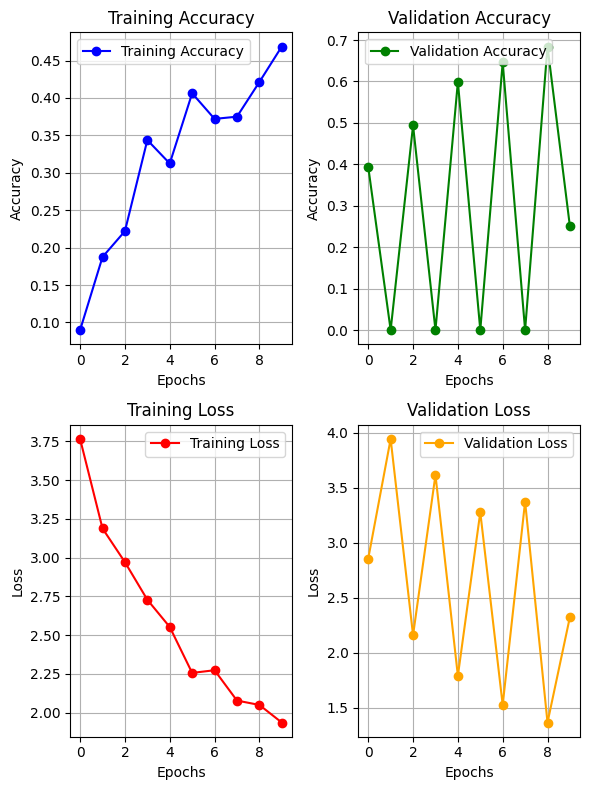

In [ ]:
import matplotlib.pyplot as plt

# Extract training and validation metrics from history
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Plot all metrics in a 2x2 grid
plt.figure(figsize=(6, 8))

# Training Accuracy
plt.subplot(2, 2, 1)
plt.plot(train_acc, label='Training Accuracy', marker='o', color='blue')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Validation Accuracy
plt.subplot(2, 2, 2)
plt.plot(val_acc, label='Validation Accuracy', marker='o', color='green')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')  # Position the legend in the top-left corner
plt.grid(True)


# Training Loss
plt.subplot(2, 2, 3)
plt.plot(train_loss, label='Training Loss', marker='o', color='red')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Validation Loss
plt.subplot(2, 2, 4)
plt.plot(val_loss, label='Validation Loss', marker='o', color='orange')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


###Evaluation of VGG16 with F1 Score, Precision, Recall which will help me for the comparision.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure all test samples are processed
test_generator.reset()  # Reset generator to predict all test samples
test_pred = model.predict(test_generator, verbose=1)  # Predict for all test samples

# Convert predictions to class labels
test_pred_classes = np.argmax(test_pred, axis=1)

# Extract true labels directly from the generator
true_labels = test_generator.classes

# Handle mismatch if it occurs
assert len(test_pred_classes) == len(true_labels), \
    f"Mismatch between predictions ({len(test_pred_classes)}) and true labels ({len(true_labels)})!"

# Confusion Matrix
cm = confusion_matrix(true_labels, test_pred_classes)

# Classification Report (Precision, Recall, F1-Score)
report = classification_report(true_labels, test_pred_classes, target_names=test_generator.class_indices.keys())
print("Classification Report:")
print(report)

# Overall Metrics
f1 = f1_score(true_labels, test_pred_classes, average='weighted')
precision = precision_score(true_labels, test_pred_classes, average='weighted')
recall = recall_score(true_labels, test_pred_classes, average='weighted')

print(f"Weighted F1 Score: {f1:.4f}")
print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")


29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step
Classification Report:
                                               precision    recall  f1-score   support

             Alstonia Scholaris (P2)_diseased       0.75      0.80      0.77        15
              Alstonia Scholaris (P2)_healthy       0.56      0.33      0.42        15
                           Apple___Apple_scab       1.00      0.47      0.64        15
                            Apple___Black_rot       0.68      1.00      0.81        15
                     Apple___Cedar_apple_rust       0.88      0.93      0.90        15
                              Apple___healthy       0.86      0.80      0.83        15
                          Arjun (P1)_diseased       0.82      0.93      0.88        15
                           Arjun (P1)_healthy       0.59      0.67      0.62        15
                    Background_without_leaves       1.00      0.93      0.97        15
                           Bael (P4)_diseased       1.00      0.87 

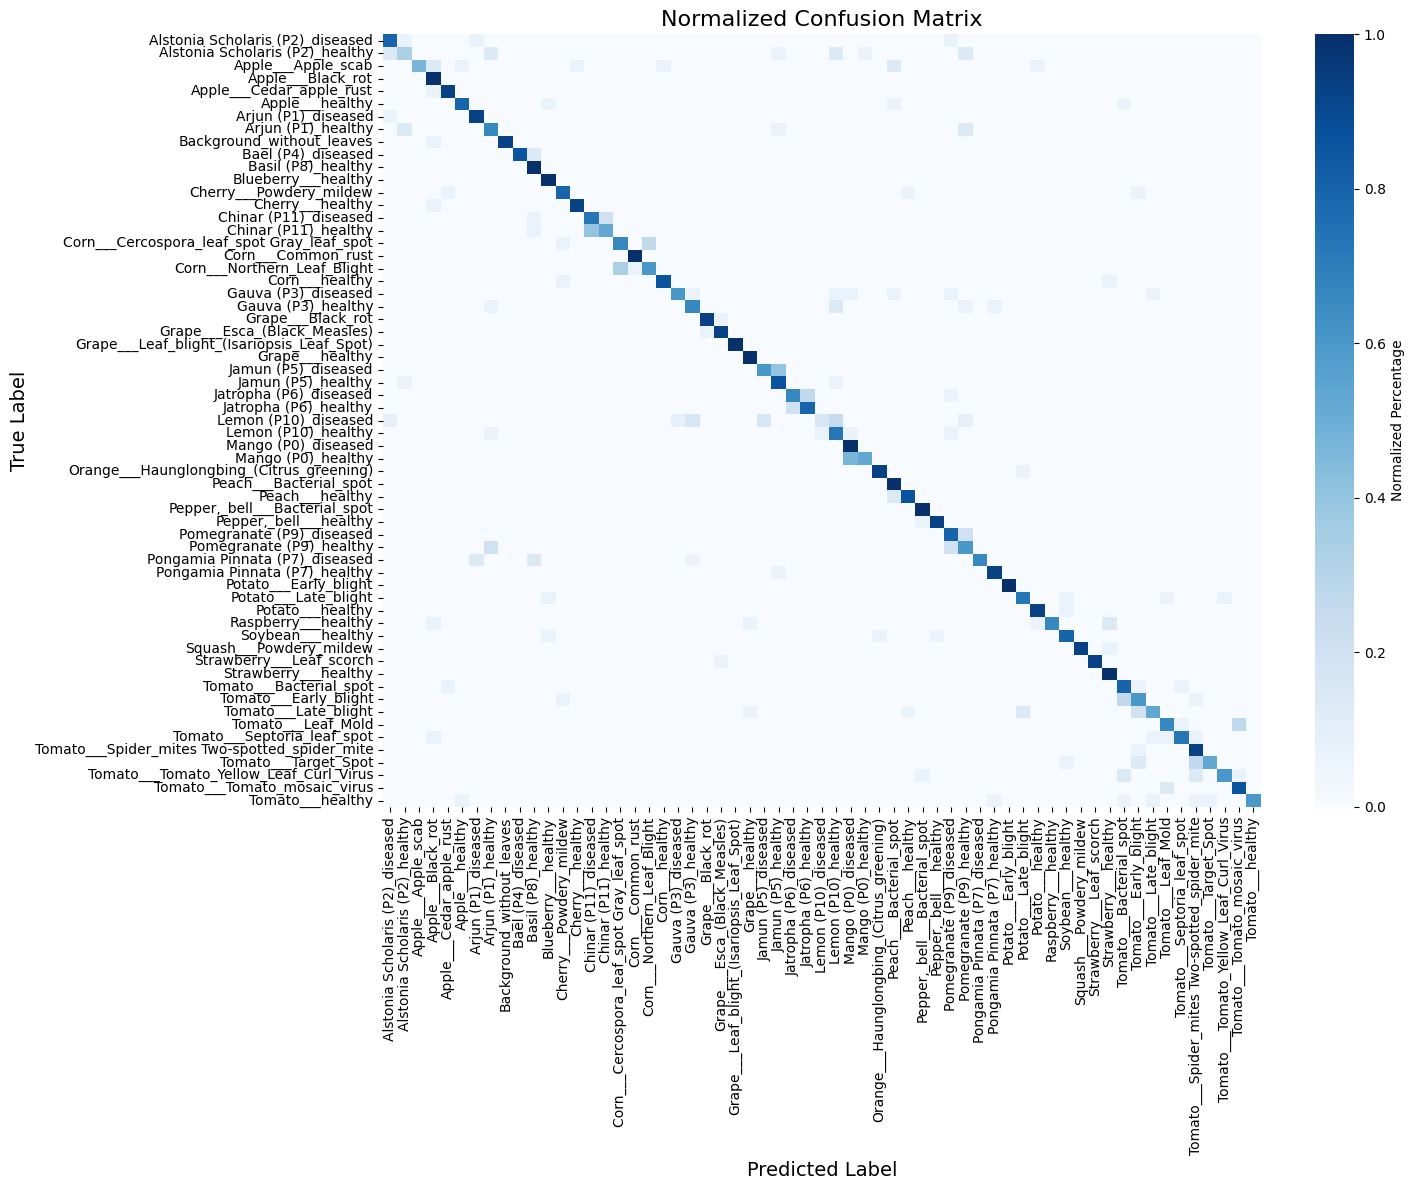

<Figure size 640x480 with 0 Axes>

In [ ]:
# Normalize confusion matrix to percentages
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot Confusion Matrix
plt.figure(figsize=(15, 12))  # Dynamically adjust size based on label count
sns.heatmap(
    cm_normalized,
    annot=False,  # Turn off annotations if there are too many labels
    cmap='Blues',
    xticklabels=test_generator.class_indices.keys(),
    yticklabels=test_generator.class_indices.keys(),
    cbar_kws={'label': 'Normalized Percentage'}
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Add titles and labels
plt.title('Normalized Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()

# Optional: Save the confusion matrix to a file
plt.savefig('confusion_matrix_large_labels.png', dpi=300)


###Final model summary with evaluation metrics.

In [ ]:
# Final model summary
model.summary()

# Final evaluation metrics
final_test_loss, final_test_acc = model.evaluate(test_generator)
print(f"Final Test Accuracy: {final_test_acc*100:.2f}%")


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 61)                  │          31,293 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,504,125 (257.51 MB)

 Trainable params: 19,956,285 (76.13 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

 Optimizer params: 39,912,576 (152.25 MB)

29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7808 - loss: 0.6541
Final Test Accuracy: 78.84%


# **###ResNet50**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.utils import class_weight
import matplotlib.pyplot as plt

# Define the data directory for plant disease detection dataset
data_dir = '/content/drive/MyDrive/split_limited_dataset'

print(os.listdir("/content/drive/MyDrive/split_limited_dataset"))


['train', 'val', 'test']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
import numpy as np

data_dir = '/content/drive/MyDrive/split_limited_dataset'

# Set up ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

# Define data generators for train, validation, and test
train_generator = train_datagen.flow_from_directory(
    data_dir + '/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir + '/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='validation'
)

# Testing generator for evaluation
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    data_dir + '/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

# Check the class labels from the generator
class_labels = train_generator.class_indices
print("Class labels:", class_labels)

# Calculate class weights to handle class imbalance
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}
print("Class weights:", class_weights)

# Now proceed with model setup and training...


Found 3403 images belonging to 61 classes.
Found 182 images belonging to 61 classes.
Found 912 images belonging to 61 classes.
Class labels: {'Alstonia Scholaris (P2)_diseased': 0, 'Alstonia Scholaris (P2)_healthy': 1, 'Apple___Apple_scab': 2, 'Apple___Black_rot': 3, 'Apple___Cedar_apple_rust': 4, 'Apple___healthy': 5, 'Arjun (P1)_diseased': 6, 'Arjun (P1)_healthy': 7, 'Background_without_leaves': 8, 'Bael (P4)_diseased': 9, 'Basil (P8)_healthy': 10, 'Blueberry___healthy': 11, 'Cherry___Powdery_mildew': 12, 'Cherry___healthy': 13, 'Chinar (P11)_diseased': 14, 'Chinar (P11)_healthy': 15, 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 16, 'Corn___Common_rust': 17, 'Corn___Northern_Leaf_Blight': 18, 'Corn___healthy': 19, 'Gauva (P3)_diseased': 20, 'Gauva (P3)_healthy': 21, 'Grape___Black_rot': 22, 'Grape___Esca_(Black_Measles)': 23, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 24, 'Grape___healthy': 25, 'Jamun (P5)_diseased': 26, 'Jamun (P5)_healthy': 27, 'Jatropha (P6)_diseased': 28, 'Ja

In [ ]:
# Checking class distribution
class_labels = train_generator.class_indices
print("Class labels:", class_labels)
classes = list(train_generator.class_indices.keys())

# Calculating class weights to handle imbalanced data
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}
print("Class weights:", class_weights)


Class labels: {'Alstonia Scholaris (P2)_diseased': 0, 'Alstonia Scholaris (P2)_healthy': 1, 'Apple___Apple_scab': 2, 'Apple___Black_rot': 3, 'Apple___Cedar_apple_rust': 4, 'Apple___healthy': 5, 'Arjun (P1)_diseased': 6, 'Arjun (P1)_healthy': 7, 'Background_without_leaves': 8, 'Bael (P4)_diseased': 9, 'Basil (P8)_healthy': 10, 'Blueberry___healthy': 11, 'Cherry___Powdery_mildew': 12, 'Cherry___healthy': 13, 'Chinar (P11)_diseased': 14, 'Chinar (P11)_healthy': 15, 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 16, 'Corn___Common_rust': 17, 'Corn___Northern_Leaf_Blight': 18, 'Corn___healthy': 19, 'Gauva (P3)_diseased': 20, 'Gauva (P3)_healthy': 21, 'Grape___Black_rot': 22, 'Grape___Esca_(Black_Measles)': 23, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 24, 'Grape___healthy': 25, 'Jamun (P5)_diseased': 26, 'Jamun (P5)_healthy': 27, 'Jatropha (P6)_diseased': 28, 'Jatropha (P6)_healthy': 29, 'Lemon (P10)_diseased': 30, 'Lemon (P10)_healthy': 31, 'Mango (P0)_diseased': 32, 'Mango (P0)_healthy

# **###ResNet50_Training**

Found 4193 images belonging to 61 classes.
Found 972 images belonging to 61 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.0994 - loss: 11.9026 - val_accuracy: 0.5906 - val_loss: 8.6433 - learning_rate: 1.0000e-04
Epoch 2/20
  1/131 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.3438 - loss: 9.5750

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3438 - loss: 9.5750 - val_accuracy: 0.5000 - val_loss: 9.2253 - learning_rate: 1.0000e-04
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 279s 2s/step - accuracy: 0.4593 - loss: 8.9046 - val_accuracy: 0.7760 - val_loss: 6.9549 - learning_rate: 1.0000e-04
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5938 - loss: 7.8457 - val_accuracy: 0.8333 - val_loss: 6.7150 - learning_rate: 1.0000e-04
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.6625 - loss: 7.2715 - val_accuracy: 0.8740 - val_loss: 6.0055 - learning_rate: 1.0000e-04
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8438 - loss: 6.2456 - val_accuracy: 0.7500 - val_loss: 5.9523 - learning_rate: 1.0000e-04
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.7393 - loss: 6.2902 - val_accuracy: 0.8802 - val_loss: 5.3833 - learning_rate: 1.0000e-04
Epoch 8/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - accuracy: 0.906

Test Loss: 2.8748621940612793
Test Accuracy: 91.89%


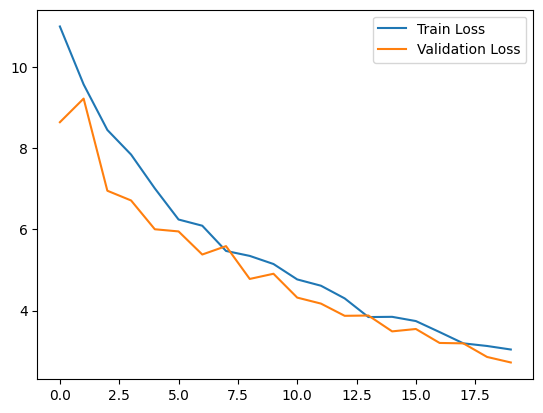

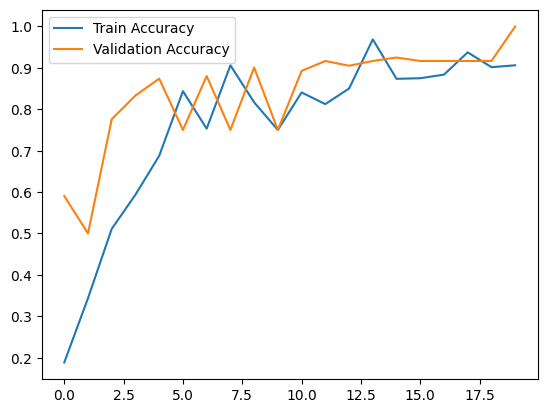

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Paths to datasets
train_dir = "/content/drive/MyDrive/split_limited_dataset/train"
val_dir = "/content/drive/MyDrive/split_limited_dataset/val"
test_dir = "/content/drive/MyDrive/split_limited_dataset/test"

# Data generators with preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Class weights for imbalance
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))

# ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze most layers
for layer in base_model.layers[:-10]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = Dropout(0.6)(x)
output = Dense(len(train_generator.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile with optimizer and loss
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=1
)
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=3, verbose=1
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20,
    class_weight=class_weights,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save('resnet50_model_fixed.h5')



###Evaluation of ResNet50 with F1 Score, Precision, Recall which will help me for the comparision.

29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step
Classification Report:
                                               precision    recall  f1-score   support

             Alstonia Scholaris (P2)_diseased       0.00      0.00      0.00        15
              Alstonia Scholaris (P2)_healthy       0.00      0.00      0.00        15
                           Apple___Apple_scab       0.00      0.00      0.00        15
                            Apple___Black_rot       0.00      0.00      0.00        15
                     Apple___Cedar_apple_rust       0.07      0.07      0.07        15
                              Apple___healthy       0.00      0.00      0.00        15
                          Arjun (P1)_diseased       0.00      0.00      0.00        15
                           Arjun (P1)_healthy       0.00      0.00      0.00        15
                    Background_without_leaves       0.00      0.00      0.00        15
                           Bael (P4)_diseased       0.07      0.07 

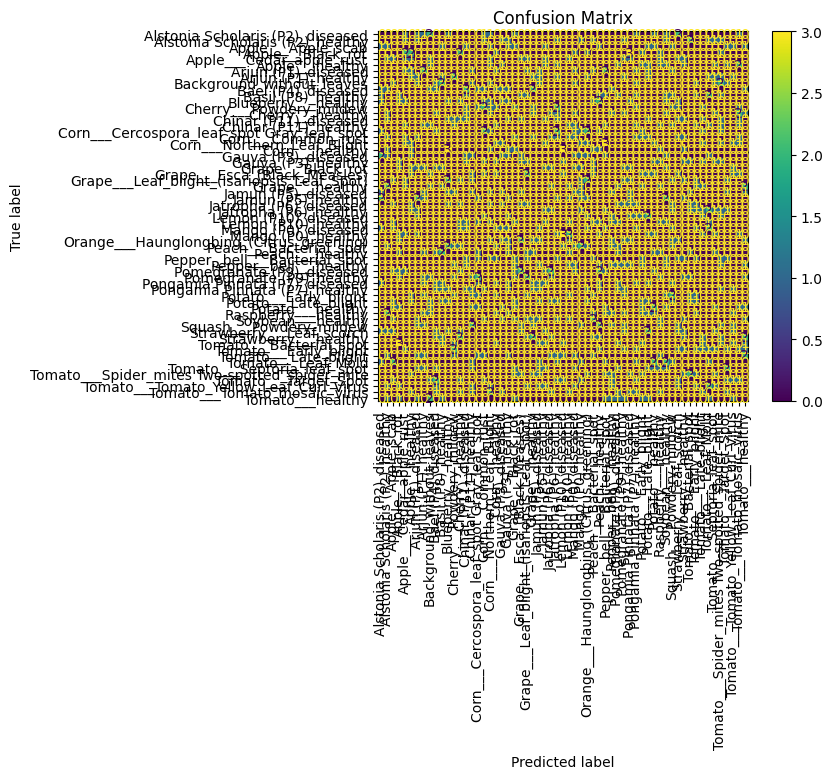

In [ ]:
# Adjust predictions to match the number of true labels
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Match true labels to predictions
true_classes = test_generator.classes[:len(predicted_classes)]

# Classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='viridis', xticks_rotation='vertical', values_format='d')
plt.title('Confusion Matrix')
plt.show()


###Final model summary with evaluation metrics

###NEW BY SEPERATING DATA AND MODELS BOTH

###VGG16 WITH 12-TYPES

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from PIL import Image
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPooling2D , Dropout , Activation , BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , Adamax
# from tensorflow.keras import regularizers
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import image as keras_image
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
import os
import pandas as pd

def create_dataframe(data_path):
    # List to store filepaths and labels
    filepaths = []
    labels = []

    # List all subfolders in the current data path
    main_folds = os.listdir(data_path)
    print("Main Folders:", main_folds)  # Debugging step

    # Iterate through each main folder (e.g., Basil, Lemon, etc.)
    for main_fold in main_folds:
        main_fold_path = os.path.join(data_path, main_fold)

        # Ensure it's a directory
        if os.path.isdir(main_fold_path):
            print(f"Entering Folder: {main_fold}")  # Debugging step

            # Now look into the 'healthy' and 'unhealthy' subfolders
            sub_folds = os.listdir(main_fold_path)
            print(f"  Subfolders in {main_fold}: {sub_folds}")  # Debugging step

            for sub_fold in sub_folds:
                sub_fold_path = os.path.join(main_fold_path, sub_fold)

                # Ensure it's a directory
                if os.path.isdir(sub_fold_path):
                    imgs = os.listdir(sub_fold_path)
                    print(f"    Files in {sub_fold_path}: {imgs[:5]}")  # Debugging step (print first 5 files)

                    # Iterate through images in the subfolder
                    for img in imgs:
                        img_path = os.path.join(sub_fold_path, img)

                        # Append image path and corresponding label
                        label = f"{main_fold}/{sub_fold}"  # Include main folder and subfolder in label
                        filepaths.append(img_path)
                        labels.append(label)

    # Create Pandas Series for filepaths and labels
    fseries = pd.Series(filepaths, name='Filepaths')
    lseries = pd.Series(labels, name='Labels')

    # Concatenate into a DataFrame and return
    return pd.concat([fseries, lseries], axis=1)

# Path to the dataset
data = '/content/drive/MyDrive/12_types'

# Create DataFrame
df = create_dataframe(data)
print(df.head())


Main Folders: ['Basil (P8)', 'Lemon (P10)', 'Bael (P4)', 'Mango (P0)', 'Jamun (P5)', 'Jatropha (P6)', 'Pongamia Pinnata (P7)', 'Pomegranate (P9)', 'Chinar (P11)', 'Gauva (P3)', 'Alstonia Scholaris (P2)', 'Arjun (P1)']
Entering Folder: Basil (P8)
  Subfolders in Basil (P8): ['healthy']
    Files in /content/drive/MyDrive/12_types/Basil (P8)/healthy: ['0008_0001.JPG', '0008_0003.JPG', '0008_0005.JPG', '0008_0002.JPG', '0008_0007.JPG']
Entering Folder: Lemon (P10)
  Subfolders in Lemon (P10): ['healthy', 'diseased']
    Files in /content/drive/MyDrive/12_types/Lemon (P10)/healthy: ['0010_0009.JPG', '0010_0003.JPG', '0010_0007.JPG', '0010_0001.JPG', '0010_0002.JPG']
    Files in /content/drive/MyDrive/12_types/Lemon (P10)/diseased: ['0021_0010.JPG', '0021_0009.JPG', '0021_0012.JPG', '0021_0005.JPG', '0021_0007.JPG']
Entering Folder: Bael (P4)
  Subfolders in Bael (P4): ['diseased']
    Files in /content/drive/MyDrive/12_types/Bael (P4)/diseased: ['0016_0010.JPG', '0016_0008.JPG', '0016_000

In [ ]:
df.shape

(4502, 2)

In [ ]:
print("The classes:\n", np.unique(df['Labels']))

The classes:
 ['Alstonia Scholaris (P2)/diseased' 'Alstonia Scholaris (P2)/healthy'
 'Arjun (P1)/diseased' 'Arjun (P1)/healthy' 'Bael (P4)/diseased'
 'Basil (P8)/healthy' 'Chinar (P11)/diseased' 'Chinar (P11)/healthy'
 'Gauva (P3)/diseased' 'Gauva (P3)/healthy' 'Jamun (P5)/diseased'
 'Jamun (P5)/healthy' 'Jatropha (P6)/diseased' 'Jatropha (P6)/healthy'
 'Lemon (P10)/diseased' 'Lemon (P10)/healthy' 'Mango (P0)/diseased'
 'Mango (P0)/healthy' 'Pomegranate (P9)/diseased'
 'Pomegranate (P9)/healthy' 'Pongamia Pinnata (P7)/diseased'
 'Pongamia Pinnata (P7)/healthy']


In [ ]:
# Remove 'Bael (P4)' and 'Basil (P8)' from the DataFrame
df_filtered = df[~df['Labels'].isin(['Bael (P4)/diseased', 'Basil (P8)/healthy'])]

In [ ]:
# Count the number of images in each class
class_counts = df['Labels'].value_counts()
class_counts

Labels
Jamun (P5)/diseased                 345
Pongamia Pinnata (P7)/healthy       322
Pomegranate (P9)/healthy            287
Jamun (P5)/healthy                  279
Gauva (P3)/healthy                  277
Pongamia Pinnata (P7)/diseased      276
Pomegranate (P9)/diseased           272
Mango (P0)/diseased                 265
Alstonia Scholaris (P2)/diseased    254
Arjun (P1)/diseased                 232
Arjun (P1)/healthy                  220
Alstonia Scholaris (P2)/healthy     179
Mango (P0)/healthy                  170
Lemon (P10)/healthy                 159
Basil (P8)/healthy                  148
Gauva (P3)/diseased                 142
Jatropha (P6)/healthy               133
Jatropha (P6)/diseased              124
Chinar (P11)/diseased               120
Bael (P4)/diseased                  118
Chinar (P11)/healthy                103
Lemon (P10)/diseased                 77
Name: count, dtype: int64

In [ ]:
# Remove 'Bael (P4)' and 'Basil (P8)' from the DataFrame AS we do not enough data to train the model
df_cleaned = df[~df['Labels'].isin(['Bael (P4)/diseased', 'Basil (P8)/healthy'])]


In [ ]:
# Remove all variations of 'Bael (P4)' and 'Basil (P8)' with proper escaping
df_cleaned = df[~df['Labels'].str.contains(r'Bael \(P4\)|Basil \(P8\)', regex=True)]

# Check the unique labels to ensure the classes are removed
print(df_cleaned['Labels'].value_counts())


Labels
Jamun (P5)/diseased                 345
Pongamia Pinnata (P7)/healthy       322
Pomegranate (P9)/healthy            287
Jamun (P5)/healthy                  279
Gauva (P3)/healthy                  277
Pongamia Pinnata (P7)/diseased      276
Pomegranate (P9)/diseased           272
Mango (P0)/diseased                 265
Alstonia Scholaris (P2)/diseased    254
Arjun (P1)/diseased                 232
Arjun (P1)/healthy                  220
Alstonia Scholaris (P2)/healthy     179
Mango (P0)/healthy                  170
Lemon (P10)/healthy                 159
Gauva (P3)/diseased                 142
Jatropha (P6)/healthy               133
Jatropha (P6)/diseased              124
Chinar (P11)/diseased               120
Chinar (P11)/healthy                103
Lemon (P10)/diseased                 77
Name: count, dtype: int64


<ipython-input-9-b167fbb9974d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


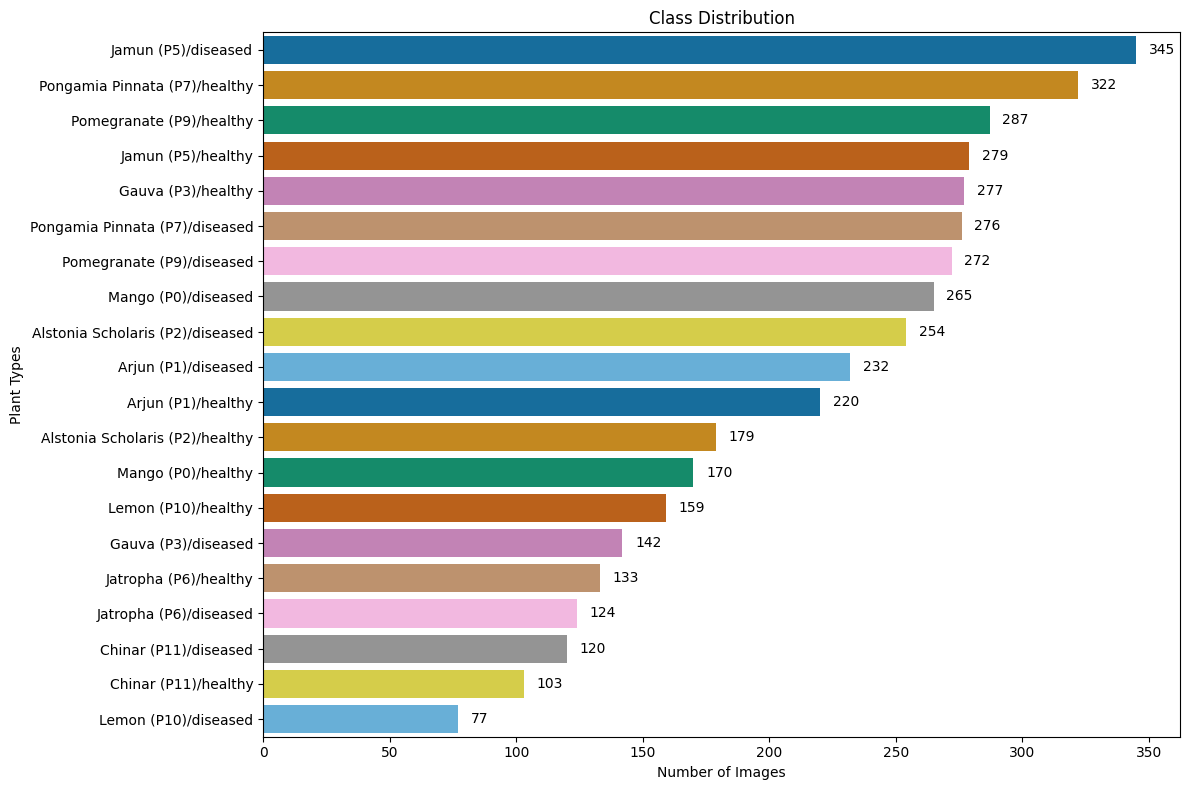

In [ ]:
# After cleaning the DataFrame by removing P4 and P8
df_cleaned = df[~df['Labels'].str.contains(r'Bael \(P4\)|Basil \(P8\)', regex=True)]

# Recompute class distribution based on the cleaned DataFrame
class_counts = df_cleaned['Labels'].value_counts()

# Generate a color palette with the same number of colors as classes
palette = sns.color_palette("colorblind", len(class_counts))  # "color blind " for accessibility

# Plot the barplot with custom colors
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x=class_counts.values,
    y=class_counts.index,
    orient='h',
    palette=palette  # Pass the color palette
)

plt.title('Class Distribution')
plt.xlabel('Number of Images')
plt.ylabel('Plant Types')
plt.tight_layout()  # Adjust the layout to prevent overlapping labels

# Add data labels to each bar
for i, v in enumerate(class_counts.values):
    ax.text(v + 5, i, str(v), color='black', va='center')

plt.show()


In [ ]:
df_cleaned = df[~df['Labels'].str.contains(r'Bael \(P4\)|Basil \(P8\)', regex=True)]
# Split the data into training and test sets (80% training, 20% test)
train_df, test_df = train_test_split(df_cleaned, test_size=0.2, random_state=42)
print(f"Training set size: {train_df.shape}")
print(f"Test set size: {test_df.shape}")

Training set size: (3388, 2)
Test set size: (848, 2)


In [ ]:
# Split the training data into training and validation sets (80% training, 20% validation)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)
print(f"Training set size after validation split: {train_df.shape}")
print(f"Validation set size: {val_df.shape}")

Training set size after validation split: (2710, 2)
Validation set size: (678, 2)


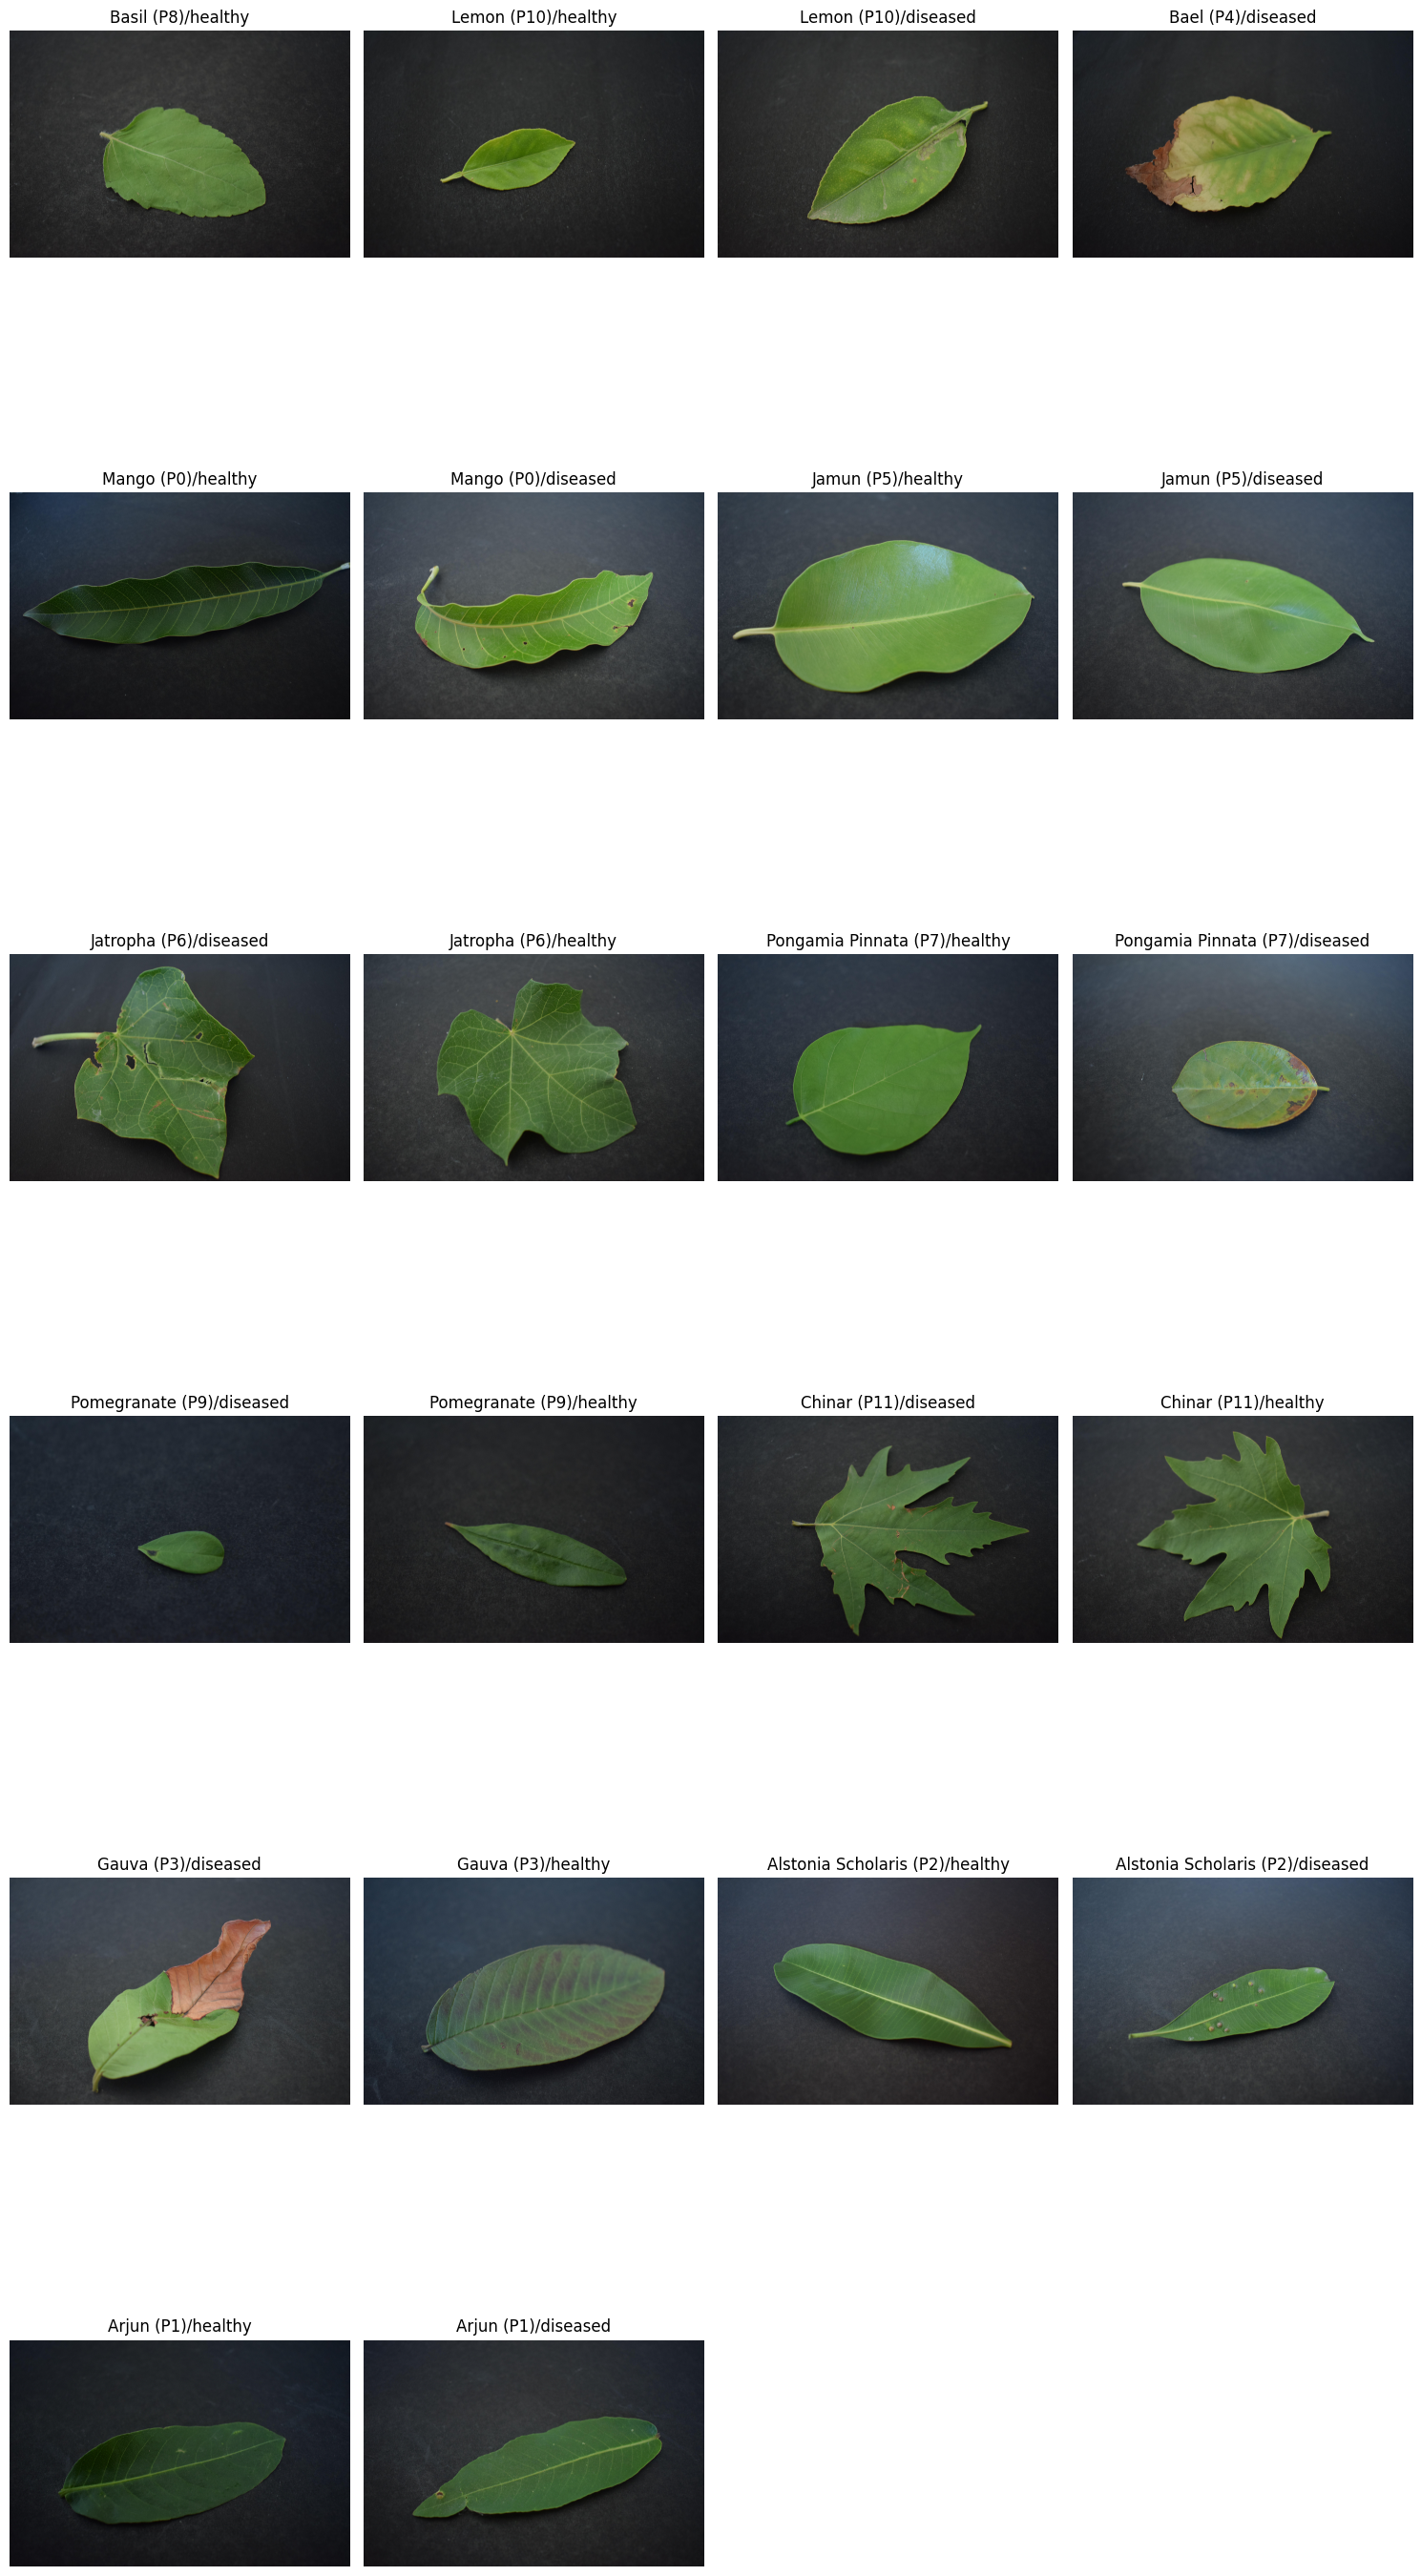

In [ ]:
# Display sample images from each class
num_classes = len(df['Labels'].unique())
num_images_per_row = 4
num_rows = (num_classes + num_images_per_row - 1) // num_images_per_row

plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on the number of rows

for i, plant_class in enumerate(df['Labels'].unique()):
    plt.subplot(num_rows, num_images_per_row, i + 1)

    # Inside the loop for displaying sample images
    image_path = os.path.join(data, df[df['Labels'] == plant_class]['Filepaths'].iloc[0])

    # Check if the image exists and can be loaded
    if os.path.exists(image_path):
        sample_image = cv2.imread(image_path)
        if sample_image is not None:
            plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
            plt.title(plant_class)
            plt.axis('off')
        else:
            print(f"Error: Unable to load image from path: {fseries}")
    else:
        print(f"Error: Image path does not exist: {fseries}")

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for validation
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for testing

# Flow from DataFrame for Train, Validation, and Test
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepaths',  # Column containing file paths to images
    y_col='Labels',     # Column containing class labels
    target_size=(224, 224),
    batch_size=32,  # Adjusted to 32 to match standard training batch sizes
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    shuffle=True,  # Shuffle the training data
    seed=42
)

valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # Validation data should not be shuffled
    seed=42
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # Test data should not be shuffled
    seed=42
)


Found 2710 validated image filenames belonging to 20 classes.
Found 678 validated image filenames belonging to 20 classes.
Found 848 validated image filenames belonging to 20 classes.


In [ ]:
# Determine the correct number of classes dynamically
num_classes = 20

# Add ReduceLROnPlateau for dynamic learning rate adjustment
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=2, min_lr=1e-6)

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Recreate the model
base_model = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=False,
                                               input_shape=(224, 224, 3), pooling='avg')

model = Sequential([
    base_model,
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Correct number of classes
])

# Compile the model
model.compile(Adamax(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping and learning rate scheduler
history = model.fit(
    x=train_generator,
    validation_data=valid_generator,
    epochs=10,
    verbose=1,
    validation_steps=None,
    shuffle=False,
    callbacks=[lr_scheduler, early_stopping]
)



58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


85/85 ━━━━━━━━━━━━━━━━━━━━ 2097s 24s/step - accuracy: 0.2748 - loss: 2.4603 - val_accuracy: 0.3643 - val_loss: 2.5607 - learning_rate: 1.0000e-04
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 420s 5s/step - accuracy: 0.6450 - loss: 1.1949 - val_accuracy: 0.6873 - val_loss: 1.8442 - learning_rate: 1.0000e-04
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 418s 5s/step - accuracy: 0.7785 - loss: 0.7683 - val_accuracy: 0.7552 - val_loss: 1.2733 - learning_rate: 1.0000e-04
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 432s 5s/step - accuracy: 0.8326 - loss: 0.5868 - val_accuracy: 0.8333 - val_loss: 0.7031 - learning_rate: 1.0000e-04
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 426s 5s/step - accuracy: 0.8506 - loss: 0.4840 - val_accuracy: 0.8466 - val_loss: 0.5706 - learning_rate: 1.0000e-04
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 404s 5s/step - accuracy: 0.8868 - loss: 0.3990 - val_accuracy: 0.8982 - val_loss: 0.3020 - learning_rate: 1.0000e-04
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 446s 5s/step - accuracy: 0.8923 - loss: 0

Training and Validation Loss/Accuracy

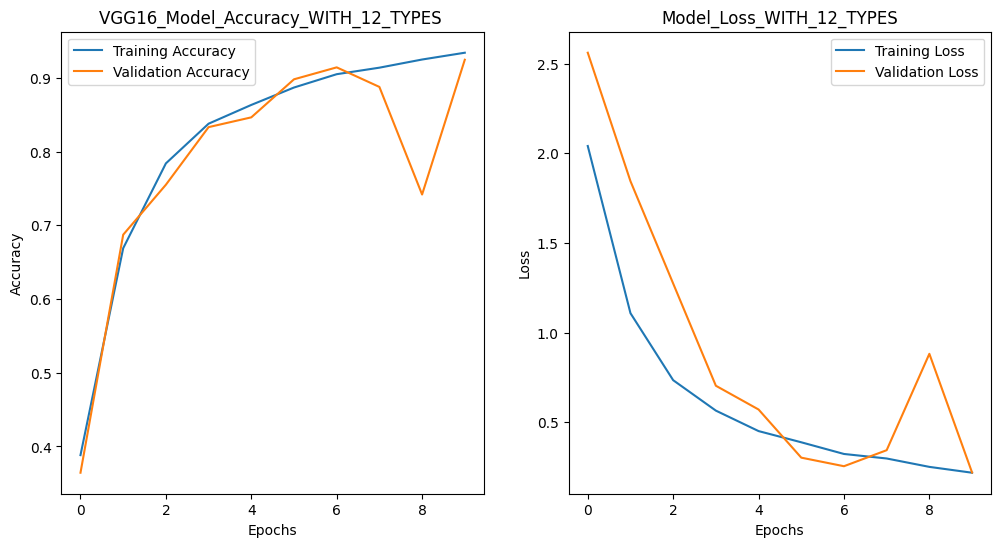

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16_Model_Accuracy_WITH_12_TYPES ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model_Loss_WITH_12_TYPES')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


Confusion Matrix with Precision and Recall

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical

# Get the true labels from the validation or test set
y_true = valid_generator.classes  # or test_generator.classes, depending on your dataset
y_true = to_categorical(y_true, num_classes=20)  # One-hot encoding if not already

# Get the predicted labels from the model
y_pred = model.predict(valid_generator, verbose=1)  # Use the appropriate generator here
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class index with highest probability

# Compute confusion matrix
cm = confusion_matrix(np.argmax(y_true, axis=1), y_pred_classes)  # Convert one-hot to class index for comparison

# Calculate precision and recall from confusion matrix
precision_per_class = cm.diagonal() / cm.sum(axis=0)
recall_per_class = cm.diagonal() / cm.sum(axis=1)

# Print results
print("Precision per class:", precision_per_class)
print("Recall per class:", recall_per_class)



22/22 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step
Precision per class: [1.         1.         0.94594595 0.79069767 0.67647059 1.
 0.95       0.9        0.91803279 1.         0.9047619  0.94736842
 1.         0.84848485 0.93617021 0.9047619  1.         0.91666667
 0.97142857 0.9787234 ]
Recall per class: [0.97916667 0.76923077 0.92105263 1.         1.         0.5
 0.79166667 1.         0.98245614 0.91666667 0.95       0.9
 0.69230769 1.         0.97777778 1.         0.95348837 0.8627451
 0.97142857 0.95833333]


In [ ]:
# Create a DataFrame to show precision and recall in a tabular format
classes = [f"Class {i}" for i in range(num_classes)]  # Replace with actual class names if available

# Create a DataFrame with Precision and Recall for each class
metrics_df = pd.DataFrame({
    'Class': classes,
    'Precision': precision_per_class,
    'Recall': recall_per_class
})

# Print the table
print(metrics_df)

       Class  Precision    Recall
0    Class 0   1.000000  0.979167
1    Class 1   1.000000  0.769231
2    Class 2   0.945946  0.921053
3    Class 3   0.790698  1.000000
4    Class 4   0.676471  1.000000
5    Class 5   1.000000  0.500000
6    Class 6   0.950000  0.791667
7    Class 7   0.900000  1.000000
8    Class 8   0.918033  0.982456
9    Class 9   1.000000  0.916667
10  Class 10   0.904762  0.950000
11  Class 11   0.947368  0.900000
12  Class 12   1.000000  0.692308
13  Class 13   0.848485  1.000000
14  Class 14   0.936170  0.977778
15  Class 15   0.904762  1.000000
16  Class 16   1.000000  0.953488
17  Class 17   0.916667  0.862745
18  Class 18   0.971429  0.971429
19  Class 19   0.978723  0.958333


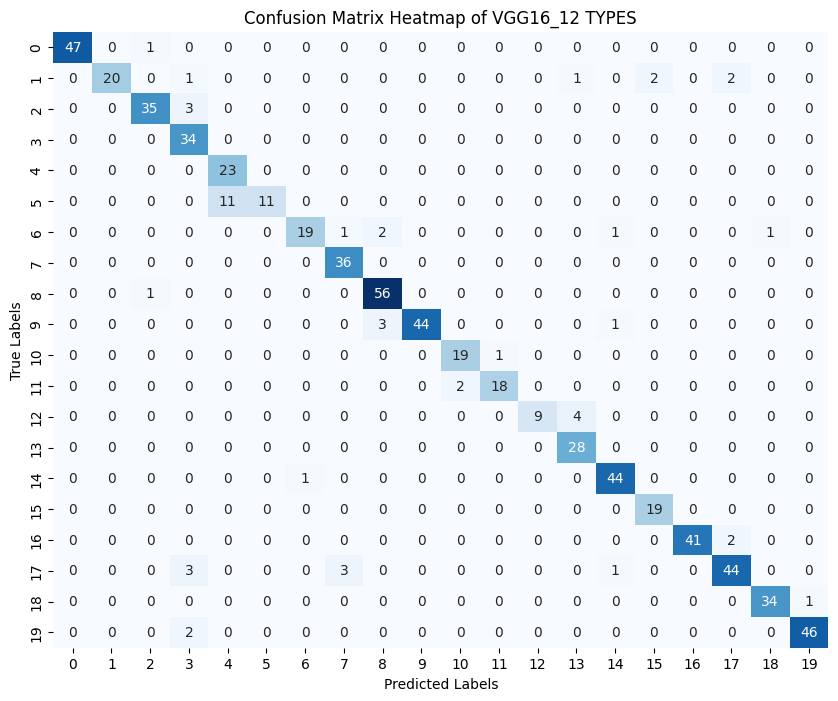

In [ ]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes), cbar=False)

# Adding labels and title
plt.title('Confusion Matrix Heatmap of VGG16_12 TYPES')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()

Evaluate the Model on the Test Set

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")



27/27 ━━━━━━━━━━━━━━━━━━━━ 477s 18s/step - accuracy: 0.9392 - loss: 0.1753
Test Loss: 0.18871673941612244
Test Accuracy: 0.9363207817077637


In [ ]:
print(f"Test Accuracy OF VGG16 WITH 12_TYPES: {test_accuracy}")

Test Accuracy OF VGG16 WITH 12_TYPES: 0.9363207817077637


In [ ]:
from tensorflow.keras.models import load_model

# Save the model in `.keras` format
model.save('vgg16_model_with_12types.keras')  # Changed to .keras


# 2.model summary
print("Model Summary:")
model.summary()

# 3. Loading the saved model (for later use)

# Load the saved model
model_loaded = load_model('vgg16_model_with_12types.keras')  # Ensure the correct file extension


# 4. Use the loaded model for prediction or further training
# For example, you can continue training or use it to make predictions


Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 512)                 │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           5,140 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,557,566 (169.97 MB)

 Trainable params: 14,852,180 (56.66 MB)

 Non-trainable params: 1,024 (4.00 KB)

 Optimizer params: 29,704,362 (113.31 MB)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 34 variables whereas the saved optimizer has 66 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
from google.colab import files
from PIL import Image
import io

# Upload image
uploaded = files.upload()

# Open the uploaded image
image_path = next(iter(uploaded))  # Get the first (and only) file
image = Image.open(image_path)
image.show()


Saving 0002_0004.JPG to 0002_0004.JPG


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Preprocess the image
img = image.load_img(image_path, target_size=(224, 224))  # Resize image
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Rescale pixel values to [0, 1]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


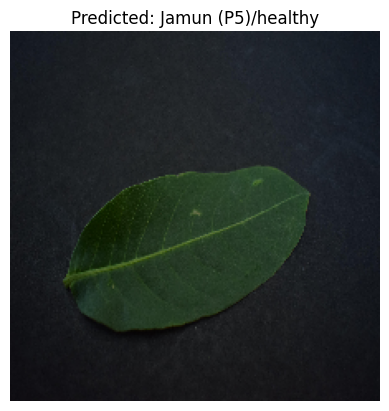

Predicted class: Jamun (P5)/healthy


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Function to predict the class of an uploaded image
def predict_image(model, img_path, class_labels):
    # Load the image
    img = image.load_img(img_path, target_size=(224, 224))  # Make sure the image size matches the model input
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image to [0, 1] if required

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)
    predicted_class = class_labels[predicted_class_index[0]]  # Get the class label

    # Show the image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

    return predicted_class

# Define class labels (you can customize this based on your label names)
class_labels = [
    'Jamun (P5)/diseased', 'Pongamia Pinnata (P7)/healthy', 'Pomegranate (P9)/healthy',
    'Jamun (P5)/healthy', 'Gauva (P3)/healthy', 'Pongamia Pinnata (P7)/diseased',
    'Pomegranate (P9)/diseased', 'Mango (P0)/diseased', 'Alstonia Scholaris (P2)/diseased',
    'Arjun (P1)/diseased', 'Arjun (P1)/healthy', 'Alstonia Scholaris (P2)/healthy',
    'Mango (P0)/healthy', 'Lemon (P10)/healthy', 'Gauva (P3)/diseased',
    'Jatropha (P6)/healthy', 'Jatropha (P6)/diseased', 'Chinar (P11)/diseased',
    'Chinar (P11)/healthy', 'Lemon (P10)/diseased'
]

# Test with your image (replace 'image_path' with the actual path to your image)
img_path = "/content/0002_0004.JPG"  # Path to the image you want to test
predicted_class = predict_image(model_loaded, img_path, class_labels)

print(f"Predicted class: {predicted_class}")



###ResNet50 with 12 types

In [1]:
# Importing the main libraries which help to do EDA, model creation, and image processing
import os  # interactation with the operating system as we are going to define file paths from dataframe
import numpy as np  # working with arrays to perform numerical operations
import pandas as pd  # it will manage our data in good form of structures
import matplotlib.pyplot as plt  #to create graphs and plots
import seaborn as sns  # to add some ordinary features in graphs as our heatmap
from sklearn.model_selection import train_test_split  # to splitt the dataset into training and testing
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # generate images with some edited fitures (Image_augmentation) for training
# from PIL import Image  is a library to open images and and work with them
import cv2  # A library to handle images and videos
import tensorflow as tf  # our Fundamental and  main library which we used to create machine learning models(here, Resnet50)

# Importing modules to create our neural network model
from tensorflow.keras.models import Sequential  # Help us to build a model layer by layer in perticular sequence
from tensorflow.keras.layers import (
    Dense,  # to produce fully connected layers in the neural network with our decided density
    Flatten,  # help us to change a multi-dimensional array into a 1D array for our input to Dense layers
    Conv2D,  # it Adds convolutional layers to detect some perticular patterns in images
    MaxPooling2D,  # Reduce the size of the image (down-sampling) but keep the important information for training purpose
    Dropout,  # Help us to reduce the overfitting by randomly ignoring some neurons which can get overfitting
    Activation,  #activation functions like ReLU or Softmax is to add linearity in our layers
    BatchNormalization,  # give boost in training and stabilize the network of neurones
    GlobalAveragePooling2D  # Averages the values in a feature map, reducing its size
)
from tensorflow.keras.optimizers import Adam, Adamax  # this is the algorithms which helps to optimize how the model will learn

# Regularization is used to prevent the model from overfitting and could perform very well on training data.
from tensorflow.keras import regularizers

# For loading and preprocessing each images
from tensorflow.keras


In [2]:
import os
import pandas as pd

def create_dataframe(data_path):
    # List to store filepaths and labels
    filepaths = []
    labels = []

    # List all subfolders in the current data path
    main_folds = os.listdir(data_path)
    print("Main Folders:", main_folds)  # Debugging step

    # Iterate through each main folder (e.g., Basil, Lemon, etc.)
    for main_fold in main_folds:
        main_fold_path = os.path.join(data_path, main_fold)

        # Ensure it's a directory
        if os.path.isdir(main_fold_path):
            print(f"Entering Folder: {main_fold}")  # Debugging step

            # Now look into the 'healthy' and 'unhealthy' subfolders
            sub_folds = os.listdir(main_fold_path)
            print(f"  Subfolders in {main_fold}: {sub_folds}")  # Debugging step

            for sub_fold in sub_folds:
                sub_fold_path = os.path.join(main_fold_path, sub_fold)

                # Ensure it's a directory
                if os.path.isdir(sub_fold_path):
                    imgs = os.listdir(sub_fold_path)
                    print(f"    Files in {sub_fold_path}: {imgs[:5]}")  # Debugging step (print first 5 files)

                    # Iterate through images in the subfolder
                    for img in imgs:
                        img_path = os.path.join(sub_fold_path, img)

                        # Append image path and corresponding label
                        label = f"{main_fold}/{sub_fold}"  # Include main folder and subfolder in label
                        filepaths.append(img_path)
                        labels.append(label)

    # Create Pandas Series for filepaths and labels
    fseries = pd.Series(filepaths, name='Filepaths')
    lseries = pd.Series(labels, name='Labels')

    # Concatenate into a DataFrame and return
    return pd.concat([fseries, lseries], axis=1)

# Path to the dataset
data = '/content/drive/MyDrive/12_types'

# Create DataFrame
df = create_dataframe(data)
print(df.head())

Main Folders: ['Basil (P8)', 'Lemon (P10)', 'Bael (P4)', 'Mango (P0)', 'Jamun (P5)', 'Jatropha (P6)', 'Pongamia Pinnata (P7)', 'Pomegranate (P9)', 'Chinar (P11)', 'Gauva (P3)', 'Alstonia Scholaris (P2)', 'Arjun (P1)']
Entering Folder: Basil (P8)
  Subfolders in Basil (P8): ['healthy']
    Files in /content/drive/MyDrive/12_types/Basil (P8)/healthy: ['0008_0001.JPG', '0008_0003.JPG', '0008_0005.JPG', '0008_0002.JPG', '0008_0007.JPG']
Entering Folder: Lemon (P10)
  Subfolders in Lemon (P10): ['healthy', 'diseased']
    Files in /content/drive/MyDrive/12_types/Lemon (P10)/healthy: ['0010_0009.JPG', '0010_0003.JPG', '0010_0007.JPG', '0010_0001.JPG', '0010_0002.JPG']
    Files in /content/drive/MyDrive/12_types/Lemon (P10)/diseased: ['0021_0010.JPG', '0021_0009.JPG', '0021_0012.JPG', '0021_0005.JPG', '0021_0007.JPG']
Entering Folder: Bael (P4)
  Subfolders in Bael (P4): ['diseased']
    Files in /content/drive/MyDrive/12_types/Bael (P4)/diseased: ['0016_0010.JPG', '0016_0008.JPG', '0016_000

In [3]:
# removed Bael and Basil as its not having the enough data
df_filtered = df[~df['Labels'].isin(['Bael (P4)/diseased', 'Basil (P8)/healthy'])]

In [4]:
# Remove all variations of 'Bael (P4)' and 'Basil (P8)' with proper escaping
df_cleaned = df[~df['Labels'].str.contains(r'Bael \(P4\)|Basil \(P8\)', regex=True)]

# Check the unique labels to ensure the classes are removed
print(df_cleaned['Labels'].value_counts())


Labels
Jamun (P5)/diseased                 345
Pongamia Pinnata (P7)/healthy       322
Pomegranate (P9)/healthy            287
Jamun (P5)/healthy                  279
Gauva (P3)/healthy                  277
Pongamia Pinnata (P7)/diseased      276
Pomegranate (P9)/diseased           272
Mango (P0)/diseased                 265
Alstonia Scholaris (P2)/diseased    254
Arjun (P1)/diseased                 232
Arjun (P1)/healthy                  220
Alstonia Scholaris (P2)/healthy     179
Mango (P0)/healthy                  170
Lemon (P10)/healthy                 159
Gauva (P3)/diseased                 142
Jatropha (P6)/healthy               133
Jatropha (P6)/diseased              124
Chinar (P11)/diseased               120
Chinar (P11)/healthy                103
Lemon (P10)/diseased                 77
Name: count, dtype: int64


In [5]:
df_cleaned = df[~df['Labels'].str.contains(r'Bael \(P4\)|Basil \(P8\)', regex=True)] #removed Bael and Basil as its not having the enough data
# Split the data into training and test sets (80% training, 20% test)
train_df, test_df = train_test_split(df_cleaned, test_size=0.2, random_state=42)
print(f"Training set size: {train_df.shape}")
print(f"Test set size: {test_df.shape}")

Training set size: (3388, 2)
Test set size: (848, 2)


In [6]:
# Split the training data into training and validation sets (80% training, 20% validation)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)
print(f"Training set size after validation split: {train_df.shape}")
print(f"Validation set size: {val_df.shape}")

Training set size after validation split: (2710, 2)
Validation set size: (678, 2)


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

# Data Generators
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Normalize images as per ResNet50
    rotation_range=20,      # rotate images up to 20 degrees
    width_shift_range=0.2,  # shift images horizontally by 20%
    height_shift_range=0.2, # shift images vertically by 20%
    shear_range=0.2,        # apply shear transformations
    zoom_range=0.2,         # zoom in/out by 20%
    horizontal_flip=True,   # flip images horizontally
    fill_mode='nearest'     # Fill missing pixels after transformation so
)

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)  # Validation preprocessing
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)   # Testing preprocessing

# Flow from DataFrame for Train, Validation, and Test
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepaths',  # Column containing file paths to images
    y_col='Labels',     # Column containing class labels
    target_size=(224, 224),
    batch_size=32,  # Batch size that how many picture will machiee learn in one way
    class_mode='categorical',  # we have 20 classes so for multi-class classification we will use categorical function.
    shuffle=True,  # Shuffle training data for better learning
    seed=42
)

valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # No shuffle for validation as machine have already learned by shuffle in training.
    seed=42
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepaths',
    y_col='Labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # No shuffle for testing also
    seed=42
)


Found 2710 validated image filenames belonging to 20 classes.
Found 678 validated image filenames belonging to 20 classes.
Found 848 validated image filenames belonging to 20 classes.


In [9]:
from tensorflow.keras.applications import ResNet50

In [12]:
#dynamically determined the number of classes
num_classes = 20

# Callbacks for training according our model resnet50
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=2, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Loading pre-trained resnet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')

# Creating a new model
model = Sequential([
    base_model,
    BatchNormalization(),
    Dense(512, activation='relu'),  # to Create fully connected layers in the neural network model
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer for classification
])

# model compilation with finetuning which is contains optimizer with law learnig rate.
model.compile(optimizer=Adamax(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training with the same epoch as VGG16
history = model.fit(
    x=train_generator,
    validation_data=valid_generator,
    epochs=10,  # same epoch as VGG16 so we can compare better
    verbose=1,
    shuffle=False,
    callbacks=[lr_scheduler, early_stopping]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


85/85 ━━━━━━━━━━━━━━━━━━━━ 3149s 37s/step - accuracy: 0.2898 - loss: 2.7174 - val_accuracy: 0.6401 - val_loss: 1.3156 - learning_rate: 1.0000e-04
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 449s 5s/step - accuracy: 0.7940 - loss: 0.6858 - val_accuracy: 0.8643 - val_loss: 0.4645 - learning_rate: 1.0000e-04
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 446s 5s/step - accuracy: 0.8750 - loss: 0.4175 - val_accuracy: 0.9159 - val_loss: 0.2811 - learning_rate: 1.0000e-04
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 420s 5s/step - accuracy: 0.9029 - loss: 0.2904 - val_accuracy: 0.9277 - val_loss: 0.2280 - learning_rate: 1.0000e-04
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 424s 5s/step - accuracy: 0.9395 - loss: 0.2064 - val_accuracy: 0.9174 - val_loss: 0.2490 - learning_rate: 1.0000e-04
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 419s 5s/step - accuracy: 0.9337 - loss: 0.2047 - val_accuracy: 0.9440 - val_loss: 0.1792 - learning_rate: 1.0000e-04
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 415s 5s/step - accuracy: 0.9621 - loss: 0

In [13]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


27/27 ━━━━━━━━━━━━━━━━━━━━ 743s 28s/step - accuracy: 0.9610 - loss: 0.1096
Test Loss: 0.11093057692050934
Test Accuracy: 0.9681603908538818


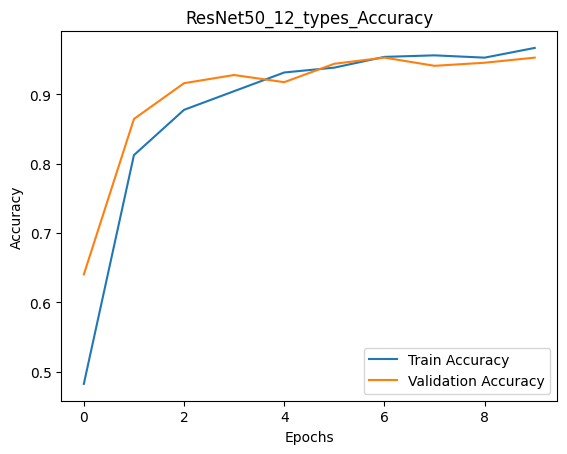

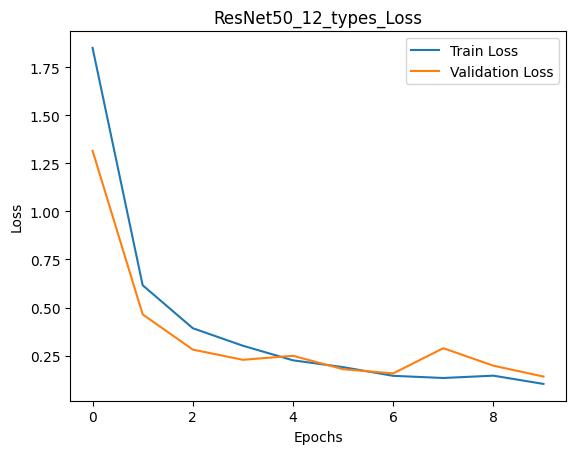

In [27]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet50_12_types_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ResNet50_12_types_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predictions
true_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_labels = predictions.argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())


27/27 ━━━━━━━━━━━━━━━━━━━━ 100s 4s/step


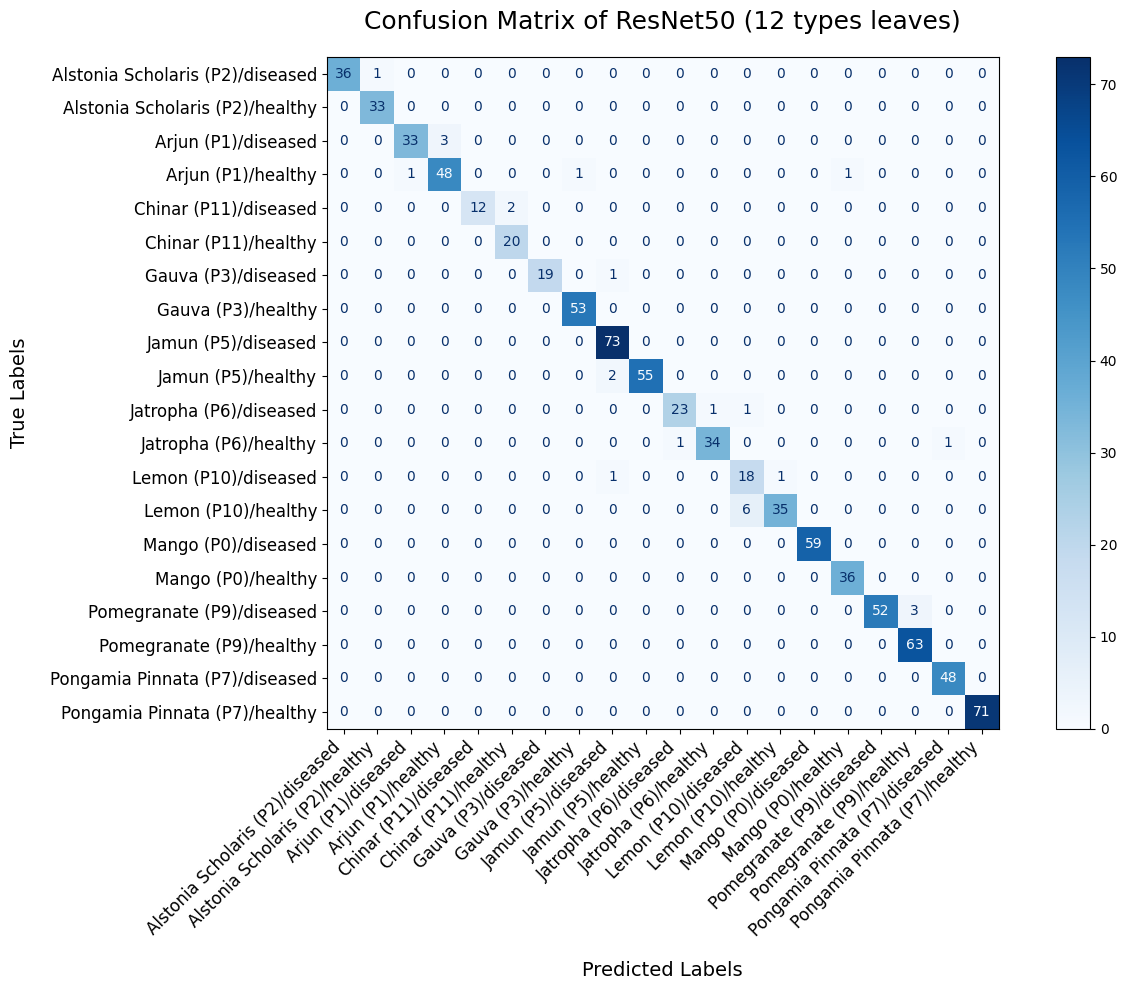

In [28]:
# Adjusted Confusion Matrix Plot with Better Label Spacing
plt.figure(figsize=(14, 10))  # Increase figure size for more space

# Plot confusion matrix with better label alignment
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())

# Customizing the plot for better readability
plt.title("Confusion Matrix of ResNet50 (12 types leaves)", fontsize=18, pad=20)  # Increase title font size and add padding
plt.xlabel("Predicted Labels", fontsize=14, labelpad=15)  # Add label padding for clarity
plt.ylabel("True Labels", fontsize=14, labelpad=15)

# Rotate x-axis labels and keep y-axis labels horizontal
plt.xticks(rotation=45, fontsize=12, ha='right')  # Rotate and align x-axis labels
plt.yticks(fontsize=12)  # Keep y-axis labels horizontal

# Adjust layout to ensure everything fits well
plt.tight_layout()
plt.show()


In [16]:
from sklearn.metrics import classification_report

# Classification report
report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys())
print("Classification Report:")
print(report)


Classification Report:
                                  precision    recall  f1-score   support

Alstonia Scholaris (P2)/diseased       1.00      0.97      0.99        37
 Alstonia Scholaris (P2)/healthy       0.97      1.00      0.99        33
             Arjun (P1)/diseased       0.97      0.92      0.94        36
              Arjun (P1)/healthy       0.94      0.94      0.94        51
           Chinar (P11)/diseased       1.00      0.86      0.92        14
            Chinar (P11)/healthy       0.91      1.00      0.95        20
             Gauva (P3)/diseased       1.00      0.95      0.97        20
              Gauva (P3)/healthy       0.98      1.00      0.99        53
             Jamun (P5)/diseased       0.95      1.00      0.97        73
              Jamun (P5)/healthy       1.00      0.96      0.98        57
          Jatropha (P6)/diseased       0.96      0.92      0.94        25
           Jatropha (P6)/healthy       0.97      0.94      0.96        36
            Le

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


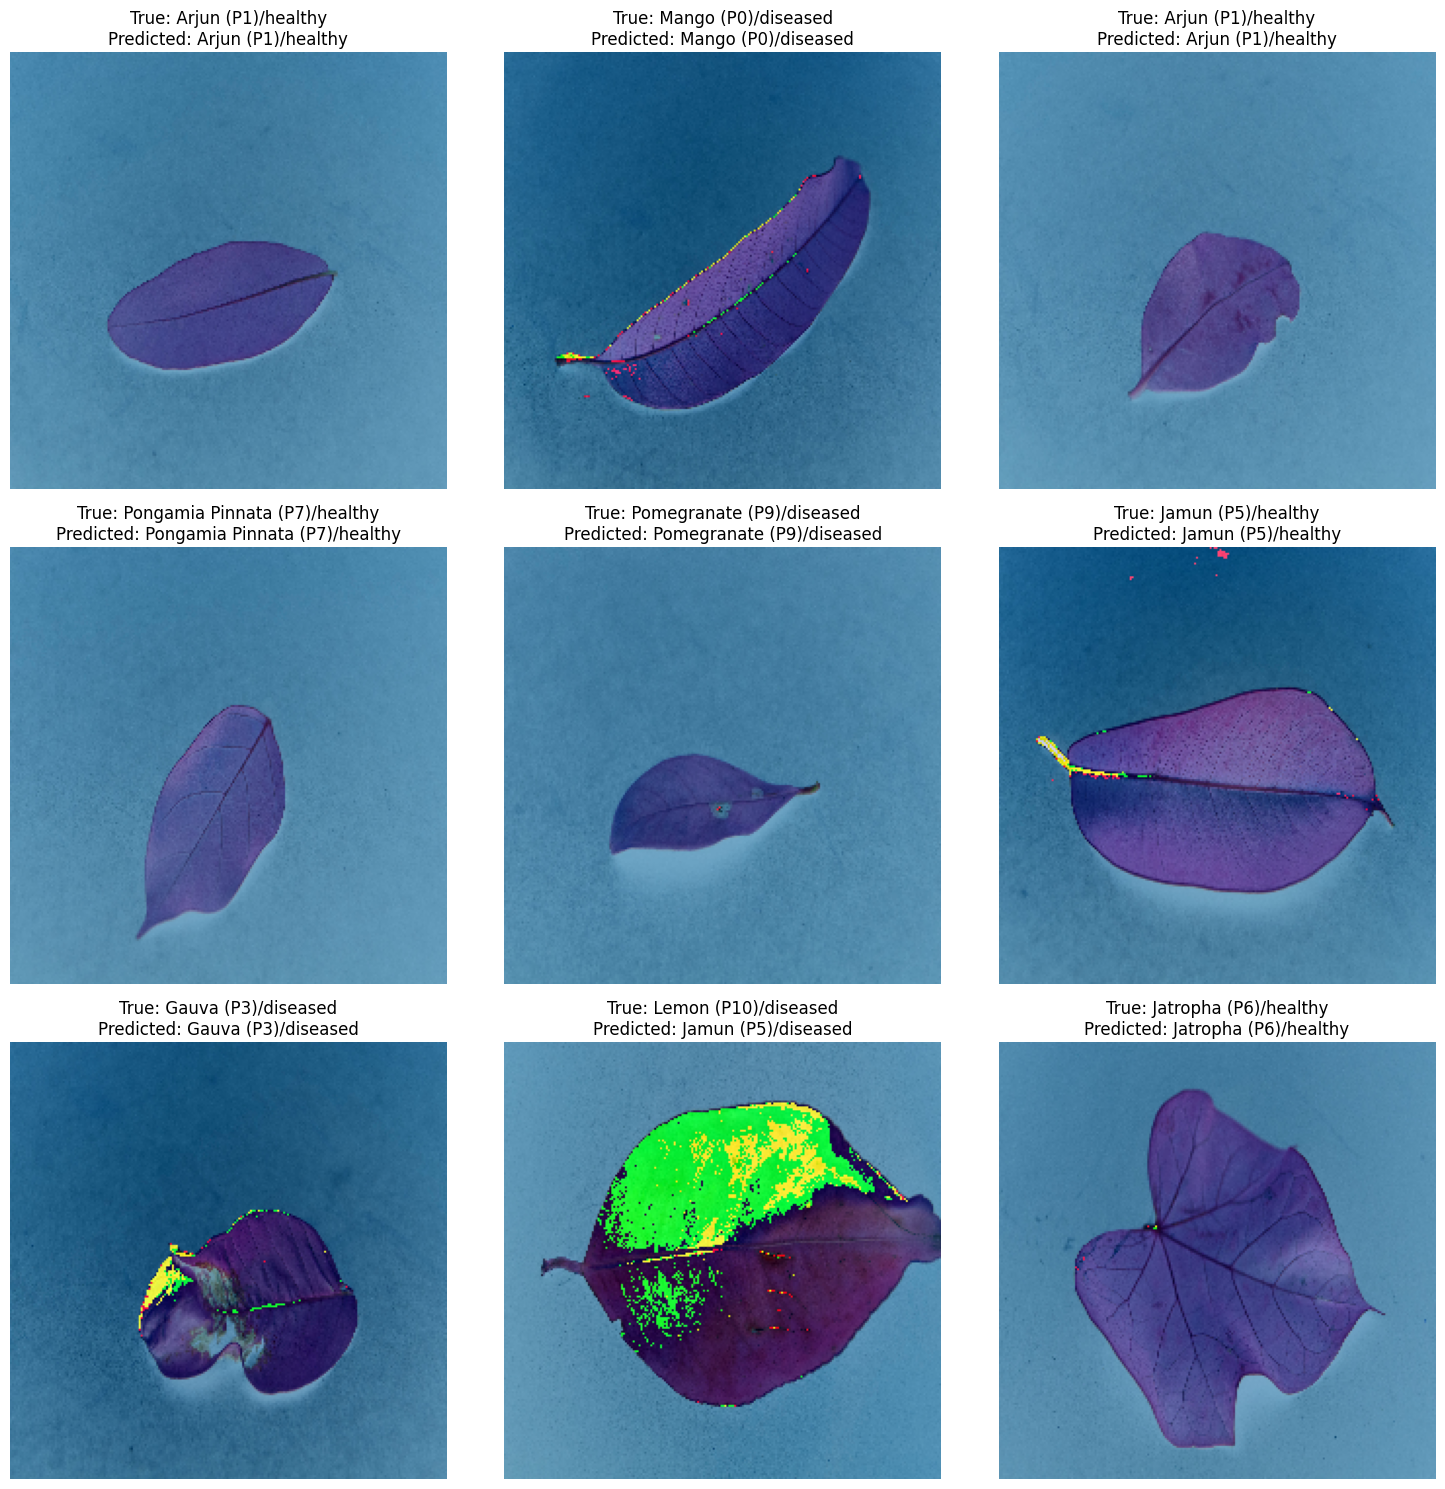

In [23]:
# Get a batch of images and their true labels
test_images, test_labels = next(test_generator)

# Rescale images back to the range [0, 255] for visualization
test_images_rescaled = test_images * 255.0  # Convert to the range [0, 255]

# Predict on the batch
predictions = model.predict(test_images)
predicted_classes = predictions.argmax(axis=1)
true_classes = test_labels.argmax(axis=1)

# Convert class indices to a list
class_names = list(test_generator.class_indices.keys())

# Visualize the images along with true and predicted labels
plt.figure(figsize=(15, 15))
for i in range(9):  # Show 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images_rescaled[i].astype(np.uint8))  # Ensure the image is in the correct format
    plt.title(f"True: {class_names[true_classes[i]]}\n"
              f"Predicted: {class_names[predicted_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [24]:
class_wise_accuracy = cm.diagonal() / cm.sum(axis=1)
for i, class_name in enumerate(test_generator.class_indices.keys()):
    print(f"Class '{class_name}': {class_wise_accuracy[i]:.2f} Accuracy")


Class 'Alstonia Scholaris (P2)/diseased': 0.97 Accuracy
Class 'Alstonia Scholaris (P2)/healthy': 1.00 Accuracy
Class 'Arjun (P1)/diseased': 0.92 Accuracy
Class 'Arjun (P1)/healthy': 0.94 Accuracy
Class 'Chinar (P11)/diseased': 0.86 Accuracy
Class 'Chinar (P11)/healthy': 1.00 Accuracy
Class 'Gauva (P3)/diseased': 0.95 Accuracy
Class 'Gauva (P3)/healthy': 1.00 Accuracy
Class 'Jamun (P5)/diseased': 1.00 Accuracy
Class 'Jamun (P5)/healthy': 0.96 Accuracy
Class 'Jatropha (P6)/diseased': 0.92 Accuracy
Class 'Jatropha (P6)/healthy': 0.94 Accuracy
Class 'Lemon (P10)/diseased': 0.90 Accuracy
Class 'Lemon (P10)/healthy': 0.85 Accuracy
Class 'Mango (P0)/diseased': 1.00 Accuracy
Class 'Mango (P0)/healthy': 1.00 Accuracy
Class 'Pomegranate (P9)/diseased': 0.95 Accuracy
Class 'Pomegranate (P9)/healthy': 1.00 Accuracy
Class 'Pongamia Pinnata (P7)/diseased': 1.00 Accuracy
Class 'Pongamia Pinnata (P7)/healthy': 1.00 Accuracy


In [26]:
# Save the model
model.save("resnet50_model.keras")
print("Dhairya your Resnet50_Model_with_12_types saved!")


Dhairya your Resnet50_Model_with_12_types saved!
